In [34]:
## imports

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from scipy.integrate import odeint
from scipy.optimize import least_squares
from matplotlib import pyplot as plt

# Part 1 Load in the data

the data file was edited to make it friendlier to this program, in paticular the " " and deg F was altered, and a time series was added that counts upwards

In [2]:
##load in the datafile

df = pd.read_csv('pulse_discharge_test_data.csv', encoding="iso-8859-1")
bad_data = df[7851:-1]
good_data = df[0:7851] #### some of the data does not at all seem to fit our goal function
print(good_data)

            TIME  time_sec    VDC-1    AMPS-1   deg_F-1    VDC-2    AMPS-2  \
0     7:49:26 AM         0  26.3467  0.012093   83.8055  26.2096 -0.012426   
1     7:49:36 AM        10  26.3484  0.013611   83.8133  26.2070 -0.011908   
2     7:49:46 AM        20  26.3477  0.025167   83.7744  26.2091  0.000537   
3     7:49:56 AM        30  26.3483  0.030908   83.8188  26.2078  0.011945   
4     7:50:06 AM        40  26.3471  0.028649   83.7770  26.2060  0.001907   
...          ...       ...      ...       ...       ...      ...       ...   
7846  5:37:06 AM     78460  22.0755  0.022352  101.5810  22.8047 -0.004908   
7847  5:37:16 AM     78470  22.0774  0.018649  101.5400  22.8049 -0.005537   
7848  5:37:26 AM     78480  22.0789  0.019500  101.5450  22.8049 -0.002241   
7849  5:37:36 AM     78490  22.0825  0.020612  101.5360  22.8060 -0.007685   
7850  5:37:46 AM     78500  22.0825  0.021686  101.5240  22.8041 -0.003870   

      deg_F-2  
0     79.4296  
1     79.4368  
2     79.3995  

In [3]:
df_slice1 = good_data[["time_sec", "VDC-1","AMPS-1", "deg_F-1"]].copy()
df_slice2 = good_data[["time_sec", "VDC-2","AMPS-2", "deg_F-2"]].copy()
print(df_slice1.head())
print(df_slice2.head())

   time_sec    VDC-1    AMPS-1  deg_F-1
0         0  26.3467  0.012093  83.8055
1        10  26.3484  0.013611  83.8133
2        20  26.3477  0.025167  83.7744
3        30  26.3483  0.030908  83.8188
4        40  26.3471  0.028649  83.7770
   time_sec    VDC-2    AMPS-2  deg_F-2
0         0  26.2096 -0.012426  79.4296
1        10  26.2070 -0.011908  79.4368
2        20  26.2091  0.000537  79.3995
3        30  26.2078  0.011945  79.4607
4        40  26.2060  0.001907  79.4264


Text(0.5, 0, 'time')

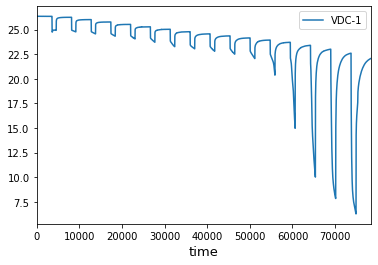

In [4]:
df_slice1.plot(x='time_sec', y='VDC-1')#check the data
plt.xlabel("time",fontsize='13')
#plt.legend(['x', 'x_dot', 'i', 'r'])

Text(0, 0.5, 'current')

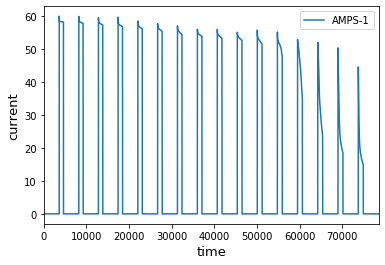

In [5]:
df_slice1.plot(x='time_sec', y='AMPS-1')#check the data
plt.xlabel("time",fontsize='13')
plt.ylabel("current",fontsize='13')

Text(0.5, 0, 'time')

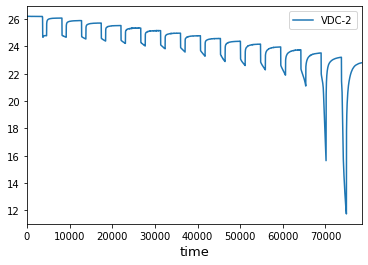

In [6]:
df_slice2.plot(x='time_sec', y='VDC-2')#check the data
plt.xlabel("time",fontsize='13')
#plt.legend(['x', 'x_dot', 'i', 'r'])

Text(0, 0.5, 'current')

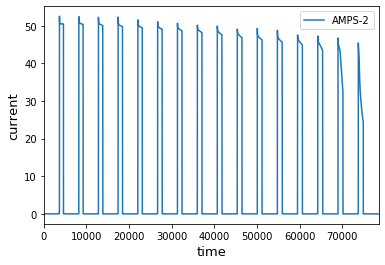

In [7]:
df_slice2.plot(x='time_sec', y='AMPS-2')#check the data
plt.xlabel("time",fontsize='13')
plt.ylabel("current",fontsize='13')

# Part 2 Numerically integrate the current to get SOC

7851


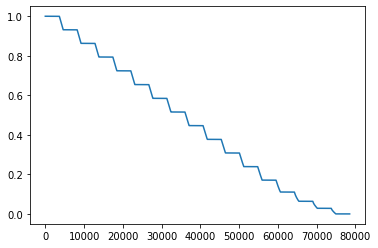

In [43]:
##dataset 1
SOC_0 = np.trapz(y=df_slice1["AMPS-1"], x=df_slice1["time_sec"])
SOC_0
print(len(df_slice1["AMPS-1"]))
values = np.zeros((len(df_slice1["AMPS-1"])))

df_slice1["current_SOC"] = values
df_slice1["current_SOC"][0] = 1
for i in range(1, len(values)):
    df_slice1["current_SOC"][i] = (SOC_0-np.trapz(y=df_slice1["AMPS-1"][0:i], x=df_slice1["time_sec"][0:i]))/SOC_0
plt.plot(df_slice1["time_sec"], df_slice1["current_SOC"])

7851


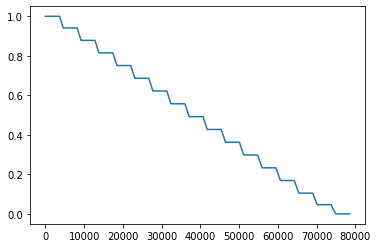

In [46]:
##dataset 2
SOC_0 = np.trapz(y=df_slice2["AMPS-2"], x=df_slice2["time_sec"])     #the integral
SOC_0
print(len(df_slice2["AMPS-2"]))
values = np.zeros((len(df_slice2["AMPS-2"])))

df_slice2["current_SOC"] = values
df_slice2["current_SOC"][0] = 1
for i in range(1, len(values)):
    df_slice2["current_SOC"][i] = (SOC_0-np.trapz(y=df_slice2["AMPS-2"][0:i], x=df_slice2["time_sec"][0:i]))/SOC_0  #integrate from initial SOC
plt.plot(df_slice2["time_sec"], df_slice2["current_SOC"])

# Part 3 Partition the dataset

In [137]:
#df_slice1['break_indices'] = df["VDC-1"].where((df_slice1['VDC-1'] - df_slice1['VDC-1'].shift(-1))>5, 'here')
#print(type(df_slice1['break_indices'][361]))
#len(df_slice1['AMPS-1'])

values = np.zeros((len(df_slice2["AMPS-2"])))
for i in range(5, len(values)-5):
    if (df_slice1["VDC-1"][i]-df_slice1["VDC-1"][i-1])<-0.5:
        values[i] = 1
    #if (((df_slice1["VDC-1"][i]-df_slice1["VDC-1"][i-5])<-0.01) and ((df_slice1["VDC-1"][i]-df_slice1["VDC-1"][i+5])<-0.01)):
        #print("found")
        #values[i] = 1
df_slice1['break_indices']=values

In [170]:
#do the same for the second dataset
values = np.zeros((len(df_slice2["AMPS-2"])))
for i in range(1, len(values)-1):
    if (df_slice2["VDC-2"][i]-df_slice2["VDC-2"][i-1])<-0.5:
        values[i] = 1
    #if (((df_slice1["VDC-2"][i]-df_slice1["VDC-2"][i-5])<-0.01) and ((df_slice1["VDC-2"][i]-df_slice1["VDC-2"][i+5])<-0.01)):
        #print("found")
        #values[i] = 1
df_slice2['break_indices']=values

In [539]:
list_breaks1 = []
series = df_slice1['break_indices']
for i in range(0, len(series)):          #return a list of the indices where "I" changes
    #print(type(series[i]))
    #if not isinstance(series[i], str):
        #list_breaks.append(i)
    if series[i]==1:
        list_breaks1.append(i-362)
        list_breaks1.append(i)

       
print(list_breaks1)

[0, 362, 459, 821, 919, 1281, 1380, 1742, 1843, 2205, 2307, 2669, 2772, 3134, 3239, 3601, 3706, 4068, 4175, 4537, 4645, 5007, 5116, 5478, 5588, 5950, 6061, 6423, 6536, 6898, 6537, 6899, 7012, 7374, 7013, 7375, 7014, 7376, 7015, 7377, 7016, 7378, 7017, 7379, 7018, 7380, 7019, 7381, 7020, 7382]


In [540]:
#do the same for the second dataset
list_breaks2 = []
series = df_slice2['break_indices']
for i in range(0, len(series)):          #return a list of the indices where "I" changes
    #print(type(series[i]))
    #if not isinstance(series[i], str):
        #list_breaks.append(i)
    if series[i]==1:
        list_breaks2.append(i-362)
        list_breaks2.append(i)

       
print(list_breaks2)

[5, 367, 459, 821, 919, 1281, 1380, 1742, 1843, 2205, 2307, 2669, 2772, 3134, 3239, 3601, 3706, 4068, 4175, 4537, 4644, 5006, 5115, 5477, 5588, 5950, 6061, 6423, 6536, 6898, 7012, 7374]


Text(0, 0.5, 'V')

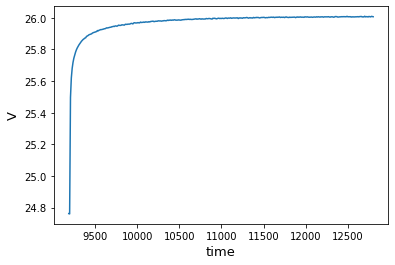

In [172]:
##test the indices to see that the separation was done properly
a = 4
b = 5
plt.plot(df_slice1['time_sec'][list_breaks1[a]:list_breaks1[b]], df_slice1['VDC-1'][list_breaks1[a]:list_breaks1[b]])
plt.xlabel("time",fontsize='13')
plt.ylabel("V",fontsize='13')

Text(0, 0.5, 'V')

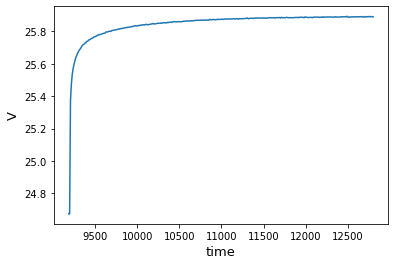

In [174]:
##test the indices to see that the separation was done properly
a = 4
b = 5
plt.plot(df_slice2['time_sec'][list_breaks2[a]:list_breaks2[b]], df_slice2['VDC-2'][list_breaks2[a]:list_breaks2[b]])
plt.xlabel("time",fontsize='13')
plt.ylabel("V",fontsize='13')

now we have trimmed up to each rest period for each pulse discharge test. 
we need to set up a time parameter for each one, i.e. set up a series of 3620 seconds which 
is the duration of each pulse test, we can then use the state of charge and the voltage to 

# Part 4 Calculate the least squares and the residuals over the periods

In [457]:
## will need the baseline time series, this is repeated
times = df_slice1["time_sec"][0:362]
times

0         0
1        10
2        20
3        30
4        40
       ... 
357    3570
358    3580
359    3590
360    3600
361    3610
Name: time_sec, Length: 362, dtype: int64

In [470]:
####calculates J vector based on number of exponential terms for one measurement
def Jac(beta_hat, i_val, t_val):
    #print(beta_hat)
    #print(beta_hat.size)
    J = np.zeros((1,beta_hat.size))
    J[0,0] = 1
    J[0,1] = i_val
    for i in range(2, len(beta_hat)):
        if i%2 == 0:
            J[0,i]=i_val*np.exp(-1*t_val/beta_hat[i+1])
        elif i%2!=0:
            J[0,i]=i_val*beta_hat[i]*-1*np.exp(-1*t_val/beta_hat[i])/(beta_hat[i-1]**2)
            
    return J;
        

In [471]:
###this is the function we are trying to optimize, one measurement
def func(beta, t_val, i_val):
    v_est = beta[0]+(i_val*beta[1])
    #print(beta)
    #print(len(beta))
    for i in range(0, (len(beta)-2)//2):
        v_est = v_est+i_val*beta[(2*i)+1]*np.exp(-1*t_val/beta[(2*i)+2])
        
    return v_est;

In [473]:
###returns the entire Jacobian
def Jac_mat(beta, i_vec, time_vec):
    Jac_mat = np.zeros((len(time_vec), len(beta)))
    for i in range(0,len(times)):
        Jac_mat[i,:] = Jac(beta, i_vec[i], times[i])
        
    return Jac_mat;

In [474]:
###returns the estimate of the solution vector
def b_est(beta, t_vec, i_vec):
    for i in range(0,len(t_vec)):
        b_hat[i] = func(beta, t_vec[i], i_vec[i])
    
    return b_hat;

## I now have functions that take the data and give me an estimate and the Jacobian

In [561]:
#test to see if the loop converges on one pulse test, series 1
##initializations
def nonlin_least_squares(a, terms):
    counter = 0
    max_n = 10    ###avoid infinite loop
    zeta = 1      ##damping factor
    beta = np.ones((terms,1))*0.1     #initial guess
    beta[0] = 24
    del_k = np.ones((beta.shape))    #some initializations
    b_vec = np.array(df_slice1['VDC-1'][list_breaks1[a]:list_breaks1[a+1]])
    b_hat = np.zeros((len(times)))
    res = b_vec-b_hat
    i_vec = np.array(df_slice1['AMPS-1'][list_breaks1[a]:list_breaks1[a+1]])
    while (np.linalg.norm(res)>0.01) and (counter<max_n):
        counter+=1
        beta = beta.reshape(terms,1)
        b_hat = b_est(beta, times, i_vec)
        JacMat = Jac_mat(beta, i_vec, times)
        res = b_hat-b_vec

        #this is the meat of the algorithm Levenburg Marquardt
        psuedoinv = np.matmul(JacMat.transpose(), JacMat)
        psuedoinv = np.linalg.inv(psuedoinv+zeta*np.eye(JacMat.shape[1]))
        psuedoinv = np.matmul(psuedoinv, JacMat.transpose())
        del_k = np.matmul(psuedoinv,res)

        del_k = del_k.reshape(terms,1)
        beta = beta.reshape(terms,1)
        beta = beta-del_k


    #print(counter)
    #print(beta)
    #print(JacMat.shape[0])
    return res, b_vec, b_hat;

Text(0, 0.5, 'Volts V')

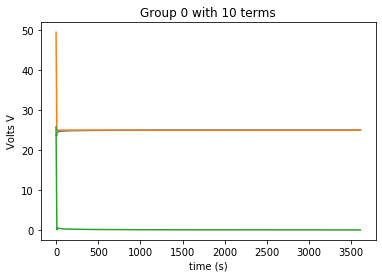

In [562]:
a = 12
terms = 10
res, b_vec, b_hat = nonlin_least_squares(a, terms)
plt.plot(times, b_vec)
plt.plot(times, b_hat)
plt.plot(times, res)
plt.title("Group 7 with 10 terms")
plt.xlabel("time (s)")
plt.ylabel("Volts V")

the b vector gets suppressed because of the scale error, it is still there

so it looks as if the method is divergent, this could come form a number of things, for one the jacobian differential could be wrong, for another the method may just be divergent, I suspect that the other factors should start small, but the divergent behavior seems to happen no matter what. I need to fix this but I am not sure how to go about it i.e. how to pinpoint the problem. Ideally this would be done for each of the partitioned data. As I add loops the values at the beginning seem to diverge further the more that I add. Though I believe the residual is still fairly small. I will discuss this further during office hours

In [554]:
### this is for the second series

def nonlin_least_squares2(a, terms):
    counter = 0
    max_n = 30    ###avoid infinite loop
    zeta = 1
    beta = np.ones((terms,1))*0.1
    beta[0] = 24
    del_k = np.ones((beta.shape))
    b_vec = np.array(df_slice2['VDC-2'][list_breaks2[a]:list_breaks2[a+1]])
    b_hat = np.zeros((len(times)))
    res = b_vec-b_hat
    i_vec = np.array(df_slice2['AMPS-2'][list_breaks2[a]:list_breaks2[a+1]])
    while (np.linalg.norm(res)>0.01) and (counter<max_n):
        counter+=1
        beta = beta.reshape(terms,1)
        b_hat = b_est(beta, times, i_vec)
        JacMat = Jac_mat(beta, i_vec, times)
        res = b_hat-b_vec

        #this is the meat of the algorithm
        psuedoinv = np.matmul(JacMat.transpose(), JacMat)
        psuedoinv = np.linalg.inv(psuedoinv+zeta*np.eye(JacMat.shape[1]))
        psuedoinv = np.matmul(psuedoinv, JacMat.transpose())
        del_k = np.matmul(psuedoinv,res)

        del_k = del_k.reshape(terms,1)
        beta = beta.reshape(terms,1)
        beta = beta-del_k


    #print(counter)
    #print(beta)
    #print(JacMat.shape[0])
    return res, b_vec, b_hat;

plt.plot(times,b_est(beta, times, i_vec))
plt.plot(times,b_vec)
plt.plot(times, res)
plt.xlabel("time(s)",fontsize='13')
plt.ylabel("voltage",fontsize='13')
plt.title("{} term fit for period {}".format(terms, a//2))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in matmul
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in matmul
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in true_divide
  if sys.path[0] == '':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in add
  import sys


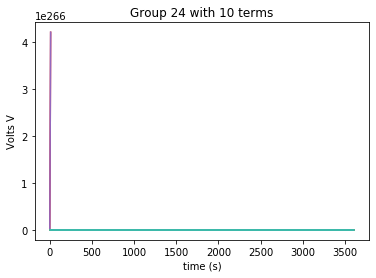

In [560]:
#here I am trying to plot all the data at once

for i in range (0,4):
    for j in range(0,len(list_breaks1)//2):
        terms = (i*2)+4
        a = j*2
        res, b_vec, b_hat = nonlin_least_squares(a, terms)
        
        plt.title("Group {} with {} terms".format(j, terms))
        plt.xlabel("time (s)")
        plt.ylabel("Volts V")
        plt.plot(times, b_vec)
        plt.plot(times, b_hat)
        plt.plot(times, res)

clearly I don't know how to use and manipulate so many plots at once. I apologize for the incompetence

fig = plt.figure()
fig.set_title("Group {} with {} terms".format(j, terms))
fig.set_xlabel("time (s)")
fig.Set_ylabel("Volts V")
fig.plot(times, b_vec)
fig.plot(times, b_hat)
fig.plot(times, res)
fig.show()

# Part 6 estimate of the curve

cheated on both and just used the steady state value

In [511]:
list_OCVS = []
stop_points = []
#list_breaks1
for i in range(0,len(list_breaks1)):
    if i%2!=0:
        stop_points.append(list_breaks1[i])
        list_OCVS.append(df_slice1["VDC-1"][list_breaks1[i]])
print(stop_points)

OCV_series = np.zeros((list_breaks[-1]))
print(OCV_series.shape)

[362, 821, 1281, 1742, 2205, 2669, 3134, 3601, 4068, 4537, 5007, 5478, 5950, 6423, 6898, 6899, 7374, 7375, 7376, 7377, 7378, 7379, 7380, 7381, 7382]
(7851,)


Text(0, 0.5, 'OCV')

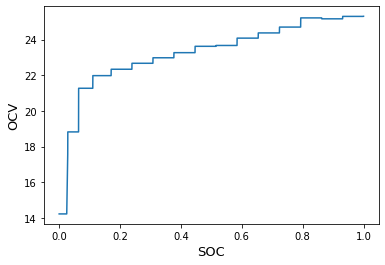

In [512]:
###this part is tricky
last = 0
for i in range(0,len(stop_points)):
    for j in range(last,stop_points[i]):
        OCV_series[j] = list_OCVS[i]
    last = stop_points[i]
    
    
for i in range(0,len(OCV_series)):
    if OCV_series[i] == 0:
        OCV_series[i] = list_OCVS[-1]


#plt.plot(df_slice1["time_sec"], OCV_series)
plt.plot(df_slice1["current_SOC"], OCV_series)
plt.xlabel("SOC",fontsize='13')
plt.ylabel("OCV",fontsize='13')

In [514]:
list_OCVS = []
stop_points = []
#list_breaks1
for i in range(0,len(list_breaks2)):
    if i%2!=0:
        stop_points.append(list_breaks2[i])
        list_OCVS.append(df_slice2["VDC-2"][list_breaks2[i]])
print(stop_points)

OCV_series = np.zeros((list_breaks[-1]))
print(OCV_series.shape)

[367, 821, 1281, 1742, 2205, 2669, 3134, 3601, 4068, 4537, 5006, 5477, 5950, 6423, 6898, 7374]
(7851,)


Text(0, 0.5, 'OCV')

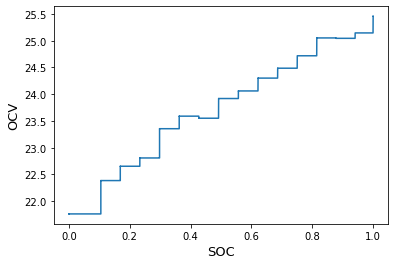

In [516]:
last = 0
for i in range(0,len(stop_points)):
    for j in range(last,stop_points[i]):
        OCV_series[j] = list_OCVS[i]
    last = stop_points[i]
    
    
for i in range(0,len(OCV_series)):
    if OCV_series[i] == 0:
        OCV_series[i] = list_OCVS[-1]


#plt.plot(df_slice1["time_sec"], OCV_series)
plt.plot(df_slice2["current_SOC"], OCV_series)
plt.xlabel("SOC",fontsize='13')
plt.ylabel("OCV",fontsize='13')